<a href="https://colab.research.google.com/github/anyazarembski/Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
Name: Anya Zarembski
<br>Date: 12/10/2021

## Problem:
In this project, we are attempting to do sentiment analysis. We will take several reviews from IMDB and run several models on them to design models that can identify sentiment. Then, we will send reviews through the model and get an accuracy score. We can then compare these models to see which model preformed the best. 


# Input Pipeline (sklearn):

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/IMDB_dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Most common words and their frequency 

I used this website as source for the common words code: https://www.delftstack.com/howto/python/python-counter-most-common/

# of samples:  50000
# of classes in sentiment:  2
median number of words per sample:  173.0
ten most common words and their count:  [('the', 568735), ('a', 306960), ('and', 301919), ('of', 283625), ('to', 261850), ('is', 203056), ('in', 169981), ('I', 132498), ('that', 126818), ('this', 113726)]


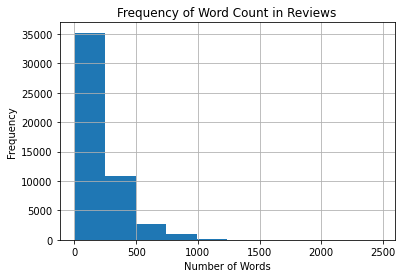

In [ ]:
## Use cells here to explore the data:
import statistics
import pandas as pd
import pylab as pl
from collections import Counter

#number of samples
print("# of samples: ", len(data))

#number of classes in target
print('# of classes in sentiment: ', len(data['sentiment'].unique()))

#median number of words per sample
n_of_words = []
for samp in data['review']:
  words = samp.split()
  n_of_words.append(len(words))
print('median number of words per sample: ', statistics.median(n_of_words))

#histogram of sample length
data['length'] = n_of_words
data['length'].hist()
pl.title("Frequency of Word Count in Reviews")
pl.xlabel("Number of Words")
pl.ylabel("Frequency")

#most common words - creative 
all_words = []
for samp in data['review']:
  words = samp.split()
  for word in words:
    all_words.append(word)

c = Counter(all_words)
print ("ten most common words and their count: ",c.most_common(10))

## Data Preparation
First, we have to import the set of stopwords from beautiful soup, so we can remove them from our dataset. These are words like I, a, to, the, etc. We do this by creating a method that lowercases all words by using lower(), and spliting apart each sentence into individual words. then, it filters through the stop words, and while that word is in our dataset, we remove it. Then we use a for loop to add all these reviews to a list without the stop words. We can then split to data set into testing and training data using sci-kit learn's built in function. 

<br>Then, we can split the data into vectors for if any given word is present in a review, using the vectorizor method. This allows us to predict sentiment more easily, as numbers (1 for word present, 0 for not) are much easier to work with than strings. 

In [ ]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [ ]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [ ]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [ ]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

# Metrics
For this dataset, we will be using accuracy. It is the best for classification, which is what we are doing. 

# Model Planning and Execution
I will use a PCA to find the best predictor words, and I will tune k, the number of words, to find the ideal word length. I test this using a kNN algorithm, as it's the most basic prediction model. Then I ran a final PCA that will edit the data. All the following methods use this data.
<br>First, I try a Support Vector Machine (SVM) model to predict sentiment. I will test the value of C to see what would work best for this model. 
<br>Next, I will try a Perceptron. I will tune the type of penalty and figure out whihc works best for this model. 
<br>Finally, I will try a Multi-Layer Perceptron, and tune based on the learning rate. 

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import neighbors
from sklearn.linear_model import Perceptron
import pandas as pd
import pylab as pl
from sklearn.decomposition import PCA

In [ ]:
#Principal Component Analysis Tuning using Knn 
n_vals = [1, 2, 3, 4, 5, 7, 10, 15, 25, 50, 100, 150, 200, 250, 300, 400, 500]
pca_acc = []

for n in n_vals:
  extractor = PCA(n_components=n, whiten=True)
  extractor.fit(train_data_vectors)
  train_transformed = extractor.transform(train_data_vectors)
  test_transformed = extractor.transform(test_data_vectors)
  knn = neighbors.KNeighborsClassifier()
  knn.fit(train_transformed, train_sln)
  predictions = knn.predict(test_transformed)
  pca_acc.append(metrics.accuracy_score(test_sln, predictions))

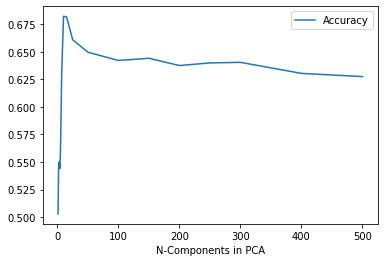

In [ ]:
#PCA Tuned Graph
pca_df = pd.DataFrame({'N-Components in PCA':n_vals, 'Accuracy':pca_acc})
pca_df.plot(x='N-Components in PCA', y='Accuracy')

In [ ]:
#Final PCA
extractor = PCA(n_components=10, whiten=True)
extractor.fit(train_data_vectors)
train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

In [ ]:
#Support Vector Classifier Tuning
c_vals = [.1, .5, .75, 1, 1.25, 1.5, 2]
svc_acc = []  

for c in c_vals: 
  svc = SVC(C = c)
  svc.fit(train_transformed,train_sln)
  predictions = svc.predict(test_transformed)
  svc_acc.append(metrics.accuracy_score(test_sln, predictions))

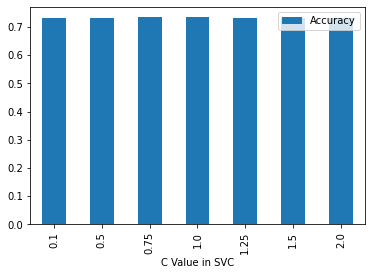

In [ ]:
svc_df = pd.DataFrame({'C Value in SVC':c_vals, 'Accuracy':svc_acc})
svc_df.plot.bar(x='C Value in SVC', y='Accuracy')

In [ ]:
svc = SVC(C = c)
svc.fit(train_transformed,train_sln)
predictions = svc.predict(test_transformed)
svc_accuracy = metrics.accuracy_score(test_sln, predictions)
print("SVC Accuracy: ", svc_accuracy)

SVC Accuracy:  0.7314


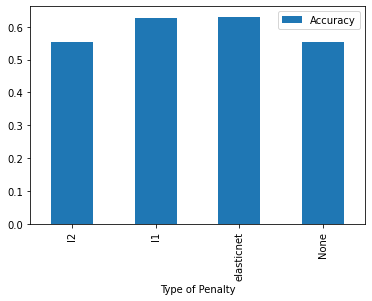

In [ ]:
#Perceptron Tuning 
penalty = ['l2','l1','elasticnet', 'None']
pen_accuracy = []

for pen in penalty:
  perc = Perceptron(penalty=pen)
  perc.fit(train_transformed,train_sln)
  predictions = perc.predict(test_transformed)
  pen_accuracy.append(metrics.accuracy_score(test_sln, predictions))

penalty_df = pd.DataFrame({'Type of Penalty':penalty, 'Accuracy':pen_accuracy})
penalty_df.plot.bar(x='Type of Penalty', y='Accuracy')

In [ ]:
#final perceptron
f_perc = Perceptron(penalty='elasticnet', eta0=.3)
f_perc.fit(train_transformed,train_sln)
p_predictions = f_perc.predict(test_transformed)

p_acc = metrics.accuracy_score(test_sln, p_predictions)
print('Accuracy of perceptron: ', p_acc)

Accuracy of perceptron:  0.6546


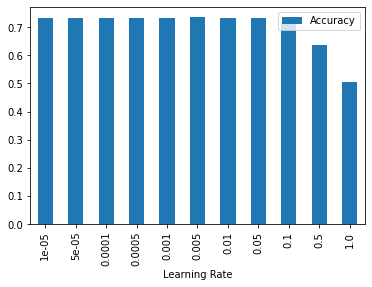

In [ ]:
#Multi-Layer Perceptron Tuning
from sklearn.neural_network import MLPClassifier

lr = [.00001, .00005, .0001, .0005, .001, .005, .01, .05, .1, .5, 1]
lr_acc = []

for rate in lr:
  mlp = MLPClassifier(random_state=1, max_iter=300, learning_rate_init= rate)
  mlp.fit(train_transformed,train_sln)
  predictions = mlp.predict(test_transformed)
  lr_acc.append(metrics.accuracy_score(test_sln, predictions))

lr_df = pd.DataFrame({'Learning Rate':lr, 'Accuracy':lr_acc})
lr_df.plot.bar(x='Learning Rate', y='Accuracy')

In [ ]:
  #Final MLP
  mlp = MLPClassifier(random_state=1, max_iter=300, learning_rate_init= .00001)
  mlp.fit(train_transformed,train_sln)
  predictions = mlp.predict(test_transformed)
  mlp_acc = metrics.accuracy_score(test_sln, predictions)

In [ ]:
print("MLP Accuracy: ", mlp_acc)

MLP Accuracy:  0.7328


# Bumps in the Road
I didn't experience any problems, other than how long it was taking to run the SVM. It was difficult to find time to be able to sit down and run it for an hour plus so I could tune it. Luckily, I was able to. It was also frustrating that you could run a tuning model for a while, only to realize that comparing that parameter didn't change the accuracy at all, and you had to run it again and again. 

# Results
The SVC had an accuracy of .7314. The Perceptron had an accuracy of .6546. The MLP had an accuracy of .7328. There is a graph of these values compared against each other below. 

For tuning, I learned that n_components = 10 is best for PCA, C = 1 is best for SVC, 'elasticnet' is the best penalty, and .00001 is the best learning rate for MLP. 

SVC Accuracy:  0.7314 
Perceptron Accuracy:  0.6546 
MLP Accuracy:  0.7328


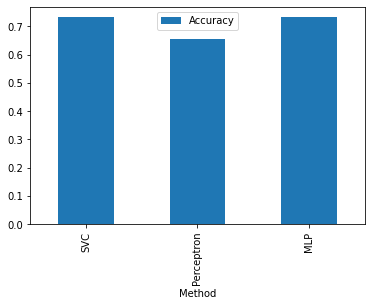

In [ ]:
methods = ['SVC', 'Perceptron', 'MLP']
accuracies = [svc_accuracy, p_acc, mlp_acc]

final_df = pd.DataFrame({'Method':methods, 'Accuracy':accuracies})
final_df.plot.bar(x='Method', y='Accuracy')

print("SVC Accuracy: ", accuracies[0], "\nPerceptron Accuracy: ", accuracies[1], "\nMLP Accuracy: ", accuracies[2])

# Conclusion
I reccomend using a more complex model, as it's going to train better by default, shown by how the perceptron compared against the MLP and SVC. I personally would go with MLP, because although the accuracy was about the same, the model ran much faster. 
<br> The perceptron was very fast, but was  the worst model, so if you were working with a huge dataset on a time limit, it might be extremely useful to use the perceptron, but it's too simple to be the best model. The MLP was the best model. It worked very fast and was quite accurate. This is because it can run through the same inputs several times before moving on, to get more accurate. While the SVC was quite accurate, it simply takes too long to run and tune, when the MLP got roughly the same accuracy in half the time. 